In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import classification_report

Завантажимо датасет __fashion_mnist__ та розділимо його на навчальний та тренувальний:

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

4422102/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


Візуалізуємо зображення з нашого датасету:

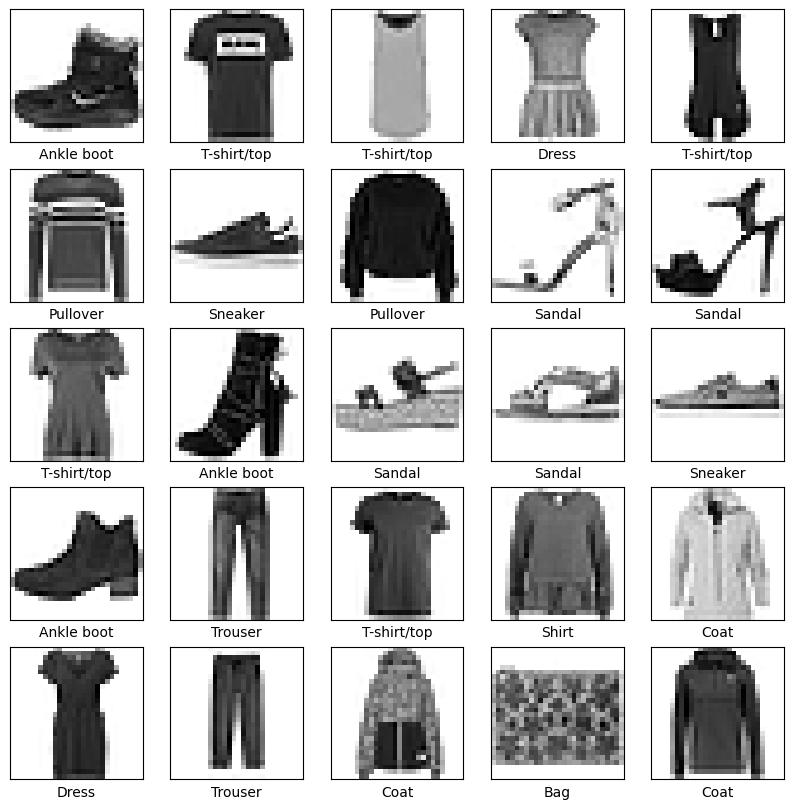

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Нормалізуємо дані датасету:

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Побудуємо модель нашої нейромережі та проведемо її навчання:

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
    ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

Проведемо навчання нашої моделі:

In [13]:
EPOCHS = 50
BATCH_SIZE=512

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/50
94/94 [==============================] - 9s 52ms/step - loss: 0.7577 - accuracy: 0.7582 - val_loss: 5.1664 - val_accuracy: 0.1005
Epoch 2/50
94/94 [==============================] - 5s 50ms/step - loss: 0.3734 - accuracy: 0.8657 - val_loss: 2.9160 - val_accuracy: 0.1448
Epoch 3/50
94/94 [==============================] - 5s 50ms/step - loss: 0.3136 - accuracy: 0.8865 - val_loss: 3.3551 - val_accuracy: 0.1959
Epoch 4/50
94/94 [==============================] - 5s 49ms/step - loss: 0.2787 - accuracy: 0.8985 - val_loss: 2.7040 - val_accuracy: 0.3163
Epoch 5/50
94/94 [==============================] - 5s 49ms/step - loss: 0.2516 - accuracy: 0.9093 - val_loss: 1.9696 - val_accuracy: 0.5005
Epoch 6/50
94/94 [==============================] - 5s 48ms/step - loss: 0.2309 - accuracy: 0.9146 - val_loss: 0.7444 - val_accuracy: 0.7691
Epoch 7/50
94/94 [==============================] - 5s 48ms/step - loss: 0.2182 - accuracy: 0.9196 - val_loss: 0.2650 - val_accuracy: 0.8997
Epoch 8/50
94

Побудуємо графіки кривих навчання:

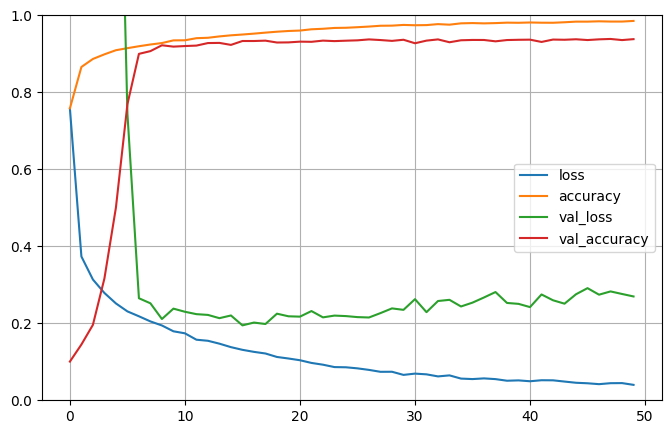

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Проведемо оцінку точності роботи нашої моделі на тренувальному та тестовому наборах даних:

In [15]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Train loss: {train_loss:.4f}")
print(f"Train accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0594 - accuracy: 0.9865
Train loss: 0.0594
Train accuracy: 0.9865
313/313 [==============================] - 1s 3ms/step - loss: 0.3017 - accuracy: 0.9333
Test loss: 0.3017
Test accuracy: 0.9333


Використаємо нашу модель для прогнозування на частині тестового датасету та візуалізуємо результати:

313/313 [==============================] - 1s 2ms/step


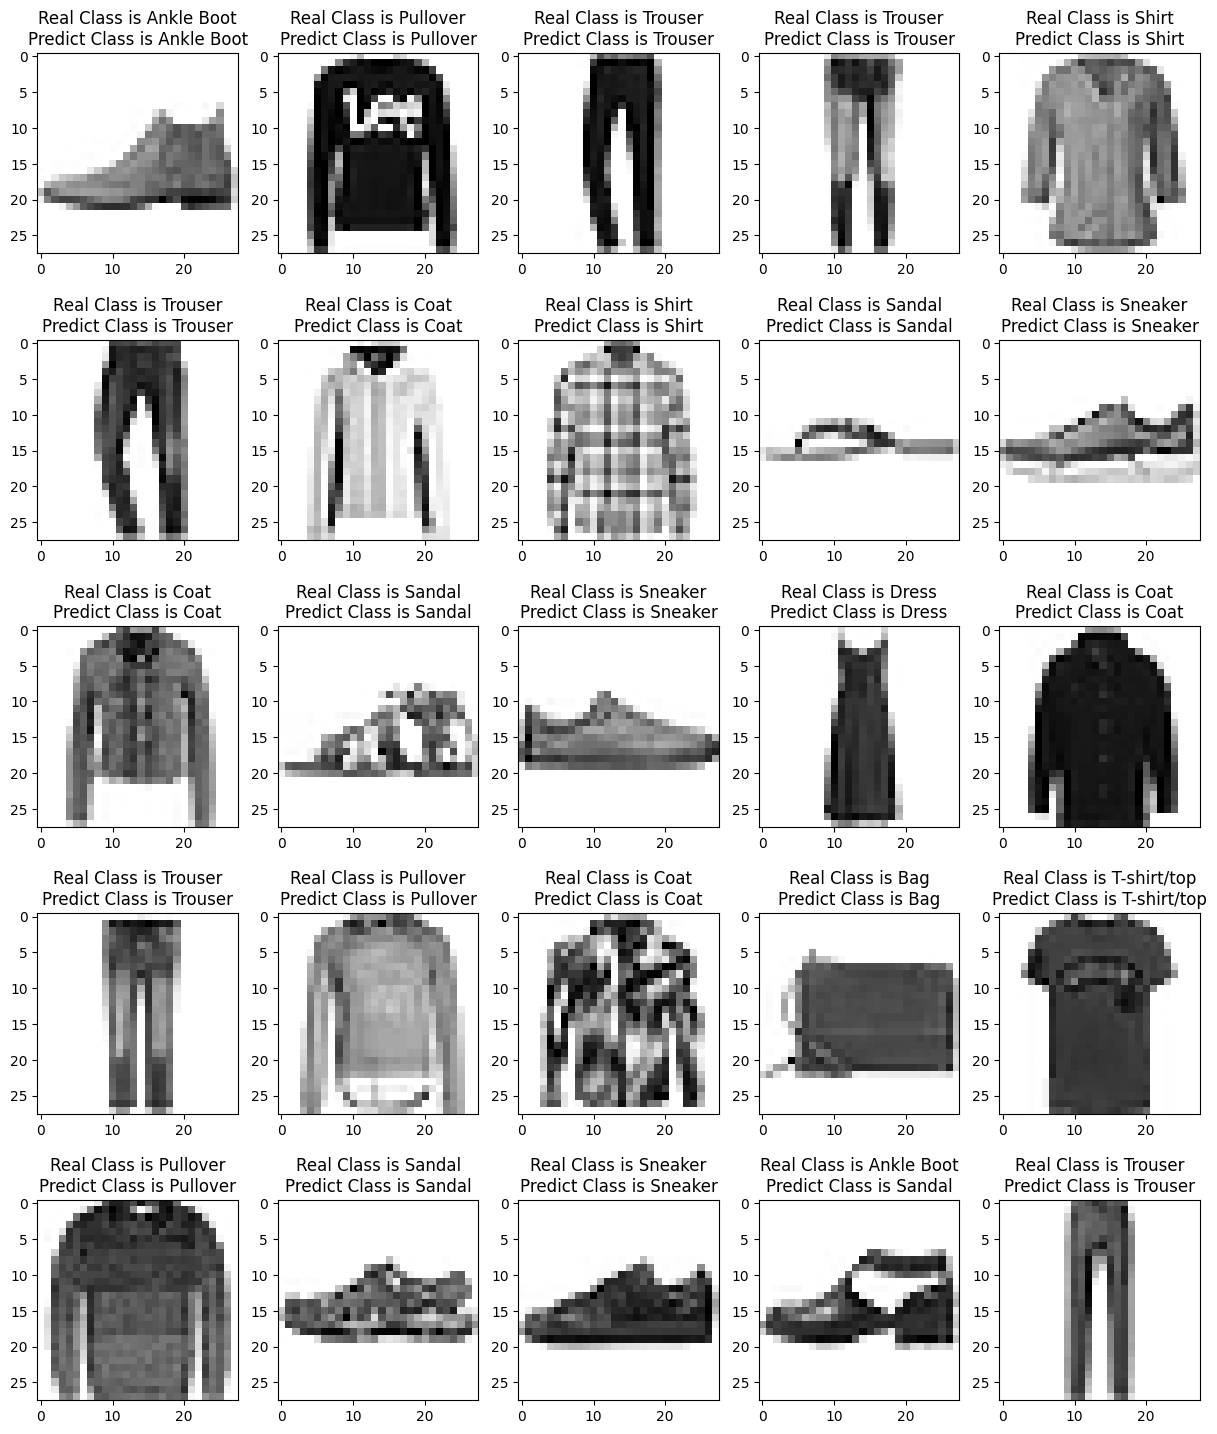

In [16]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(5, 5, figsize=(15, 18))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}")

In [17]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.88      0.89      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.92      0.89      0.90      1000
       Dress       0.93      0.94      0.93      1000
        Coat       0.89      0.92      0.90      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.80      0.80      0.80      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Як бачимо точність нашої згорткової нейромережі виявилась на 4 відсотки більшою за точність багатошарової повнозв’язної нейромережі з попереднього домашнього завдання.